**QUESTION I CODE PROOF**

Gini Index Summary:
        Split On  Gini Index  Gini Reduction
0  None (Total)    0.500000        0.000000
1       Weather    0.166667        0.333333
2          Wind    0.444444        0.055556


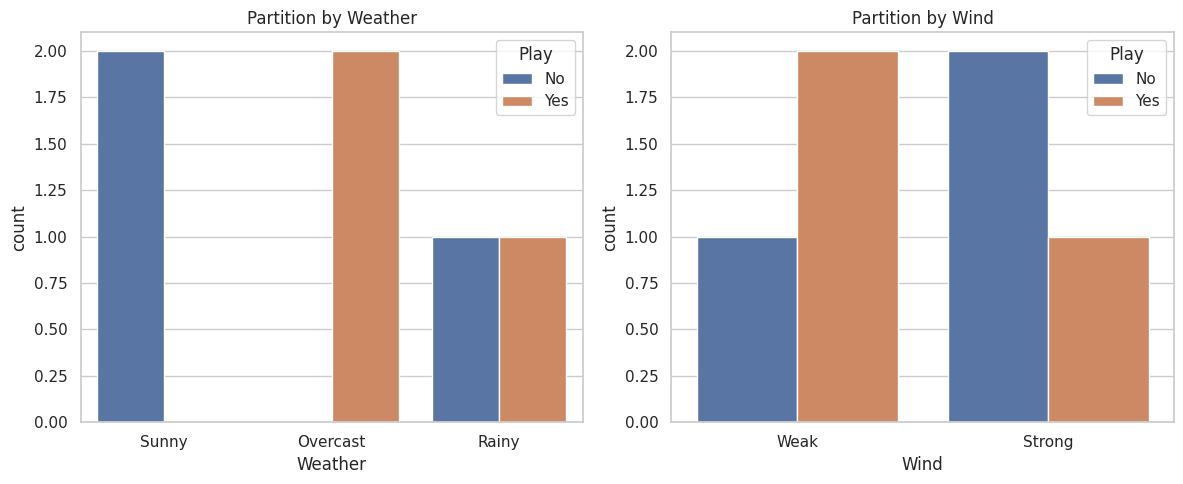


Partition Result when splitting on Weather:

Weather = Overcast
 ID   Wind Play
  3   Weak  Yes
  6 Strong  Yes
→ Play = Yes: 2, No: 0

Weather = Rainy
 ID   Wind Play
  4   Weak  Yes
  5 Strong   No
→ Play = Yes: 1, No: 1

Weather = Sunny
 ID   Wind Play
  1   Weak   No
  2 Strong   No
→ Play = Yes: 0, No: 2



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup: Small Dataset from Homework Q1
data = {
    'ID': [1, 2, 3, 4, 5, 6],
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Strong', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)

# Function to calculate Gini Index
def gini_index(groups, classes):
    total = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for c in classes:
            p = (group['Play'] == c).sum() / size
            score += p ** 2
        gini += (1 - score) * (size / total)
    return gini

# Classes present
classes = df['Play'].unique()

# Gini for the full dataset
gini_total = gini_index([df], classes)

# Gini after splitting on Weather
weather_groups = [df[df['Weather'] == w] for w in df['Weather'].unique()]
gini_weather = gini_index(weather_groups, classes)

# Gini after splitting on Wind
wind_groups = [df[df['Wind'] == w] for w in df['Wind'].unique()]
gini_wind = gini_index(wind_groups, classes)

# Summary table
summary = pd.DataFrame({
    'Split On': ['None (Total)', 'Weather', 'Wind'],
    'Gini Index': [gini_total, gini_weather, gini_wind],
    'Gini Reduction': [0, gini_total - gini_weather, gini_total - gini_wind]
})
print("Gini Index Summary:\n", summary)

# --- PLOTS ---
sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Visualize partition by Weather
sns.countplot(data=df, x='Weather', hue='Play', ax=ax[0])
ax[0].set_title('Partition by Weather')

# Visualize partition by Wind
sns.countplot(data=df, x='Wind', hue='Play', ax=ax[1])
ax[1].set_title('Partition by Wind')

plt.tight_layout()
plt.show()

# --- Print Partition Summary for Weather ---
print("\nPartition Result when splitting on Weather:\n")
for weather_val, group in df.groupby('Weather'):
    print(f"Weather = {weather_val}")
    print(group[['ID', 'Wind', 'Play']].to_string(index=False))
    play_counts = group['Play'].value_counts().to_dict()
    print(f"→ Play = Yes: {play_counts.get('Yes', 0)}, No: {play_counts.get('No', 0)}\n")


Data Loading

In [2]:
import pandas as pd

# Define the URL and column names
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]

# Load the dataset
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows
df.head()


,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Exploratory Data Analysis (EDA)

In [3]:
# Display basic statistics of the dataset
df.describe()


,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Class Distribution

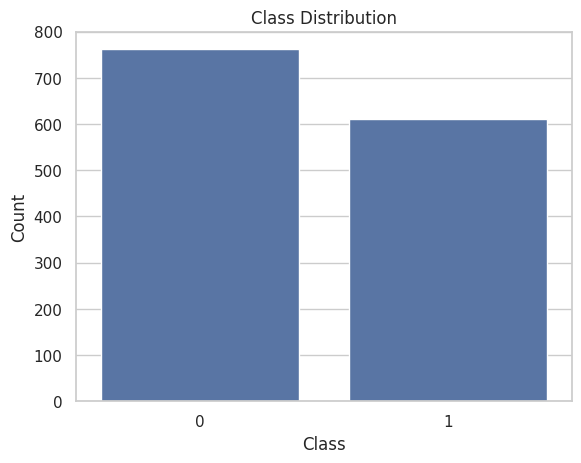

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Feature Distributions

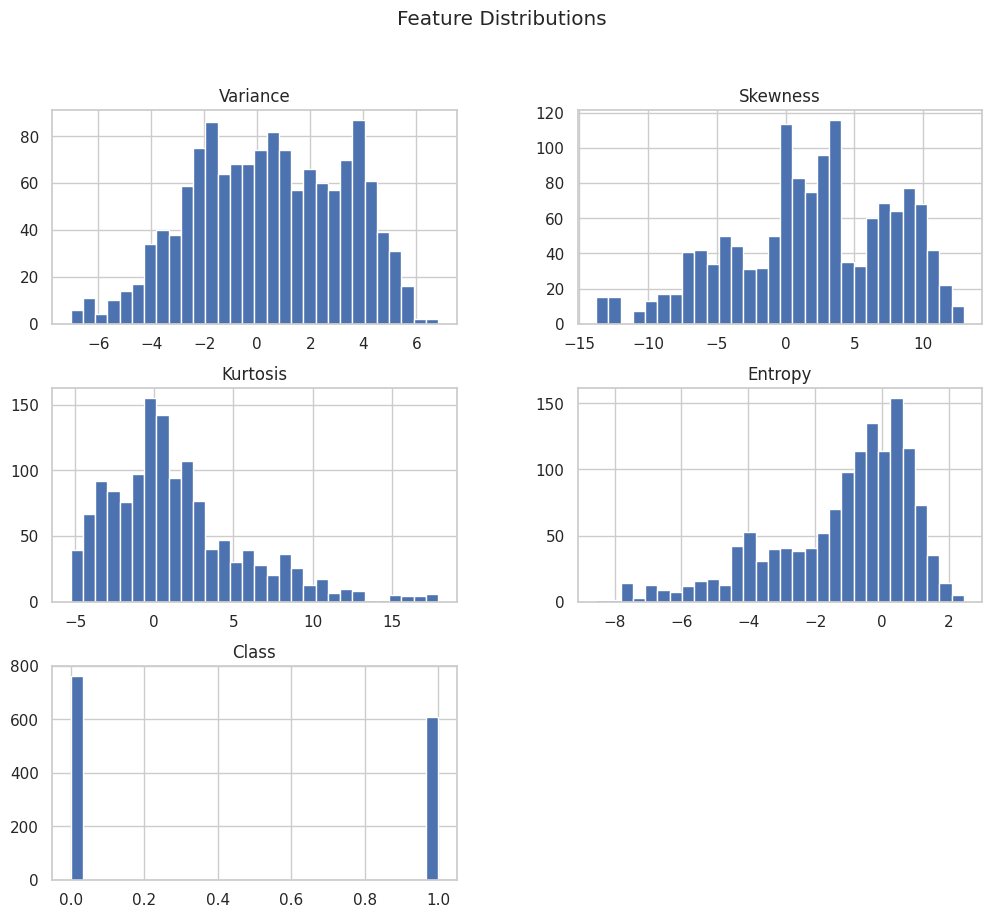

In [5]:
# Plot histograms for each feature
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Feature Distributions')
plt.show()


Pairwise Relationships

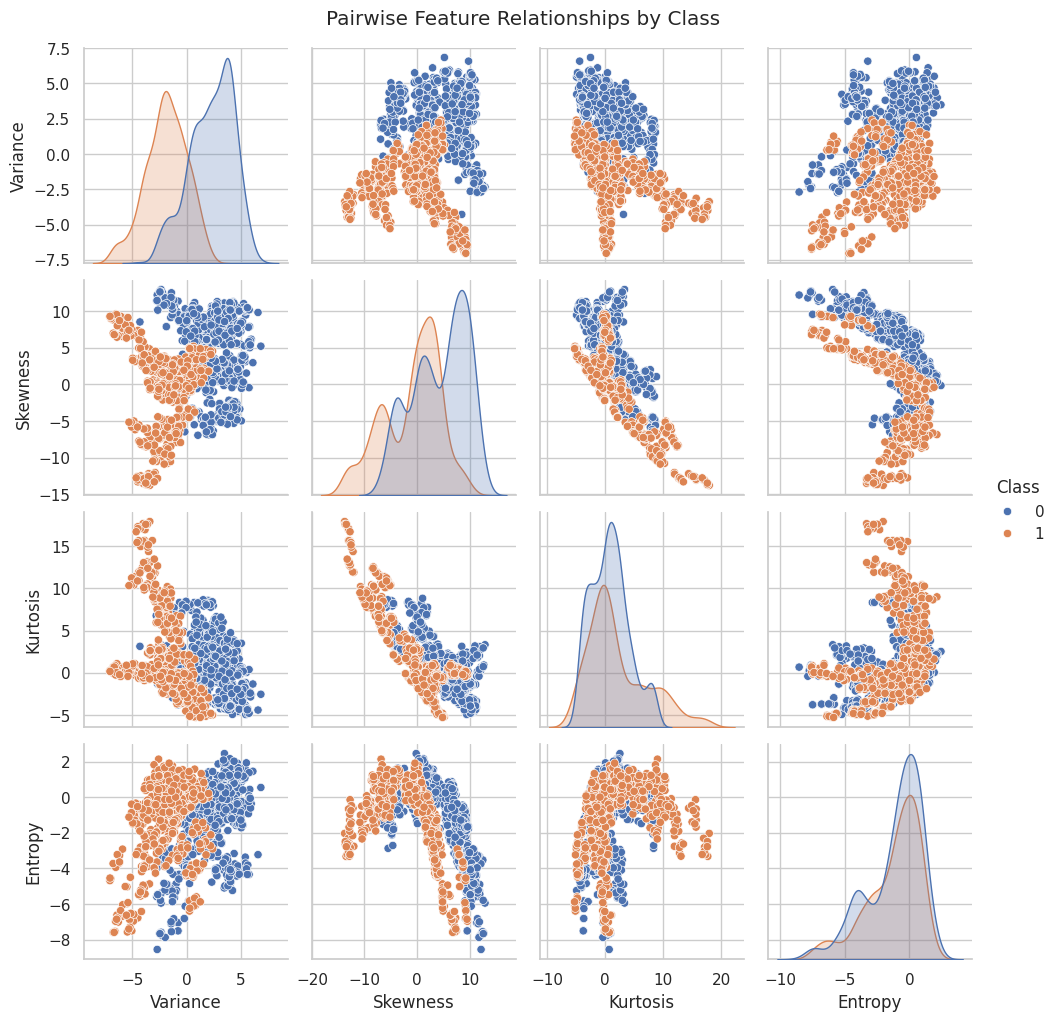

In [6]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Class')
plt.suptitle('Pairwise Feature Relationships by Class', y=1.02)
plt.show()


Feature Engineering

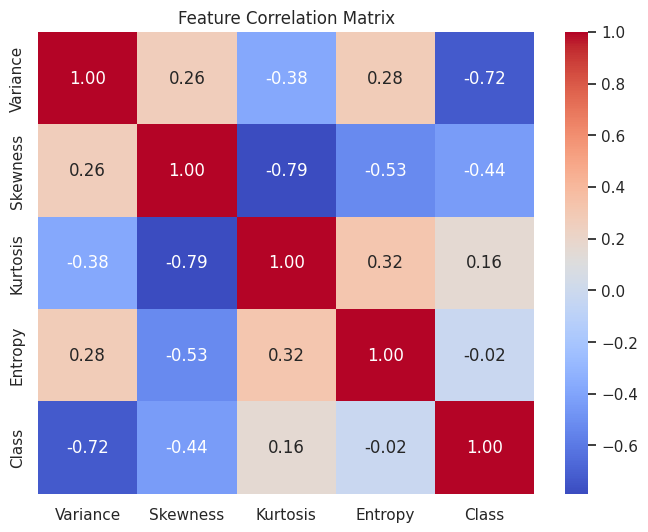

In [7]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


 Model Training and Evaluation

In [8]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns='Class')
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

Model Evaluation

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.93      0.96       127

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.97       275
weighted avg       0.97      0.97      0.97       275



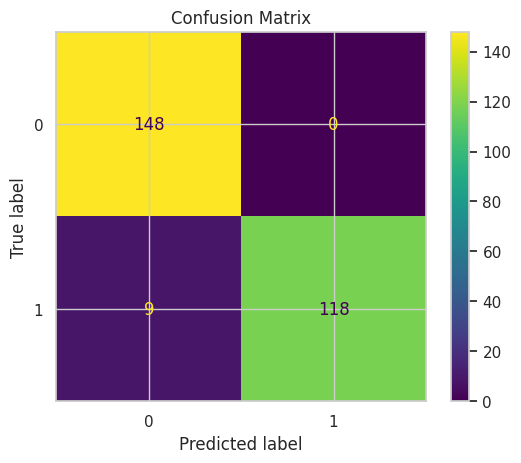

In [10]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predict on the test set
y_pred = clf.predict(X_test)

# Display the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


Decision Tree Visualization

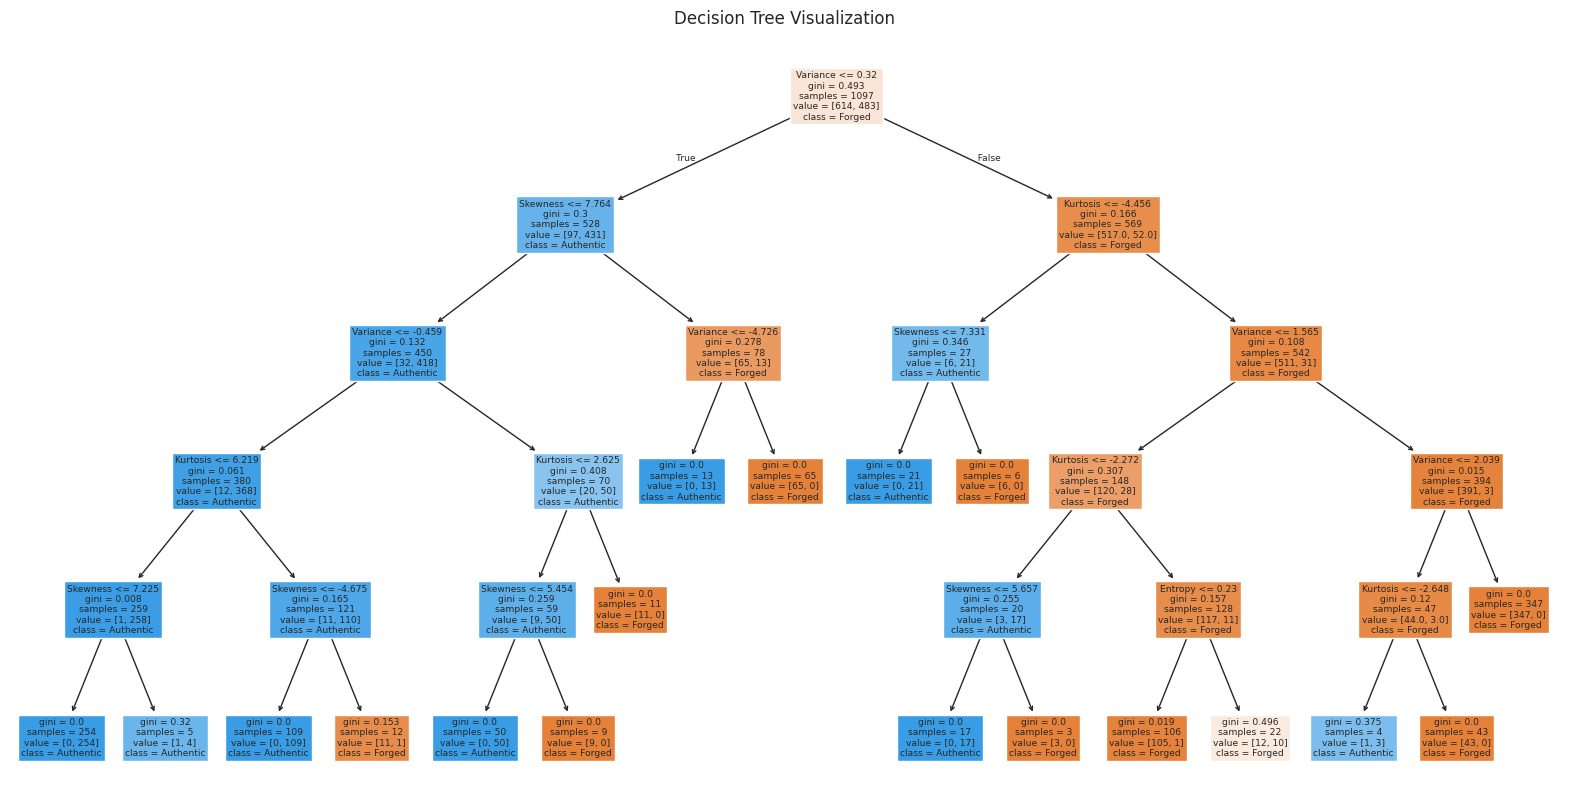

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['Forged', 'Authentic'],  # <-- Correct order
          filled=True)
plt.title('Decision Tree Visualization')
plt.show()


Feature Importance Analysis

<ipython-input-16-c24bc6ec964b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


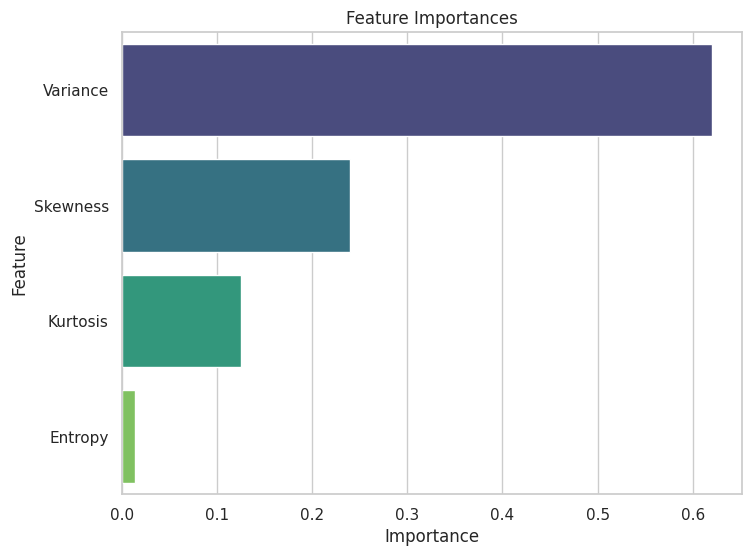

In [16]:
# Retrieve feature importances
importances = clf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()
